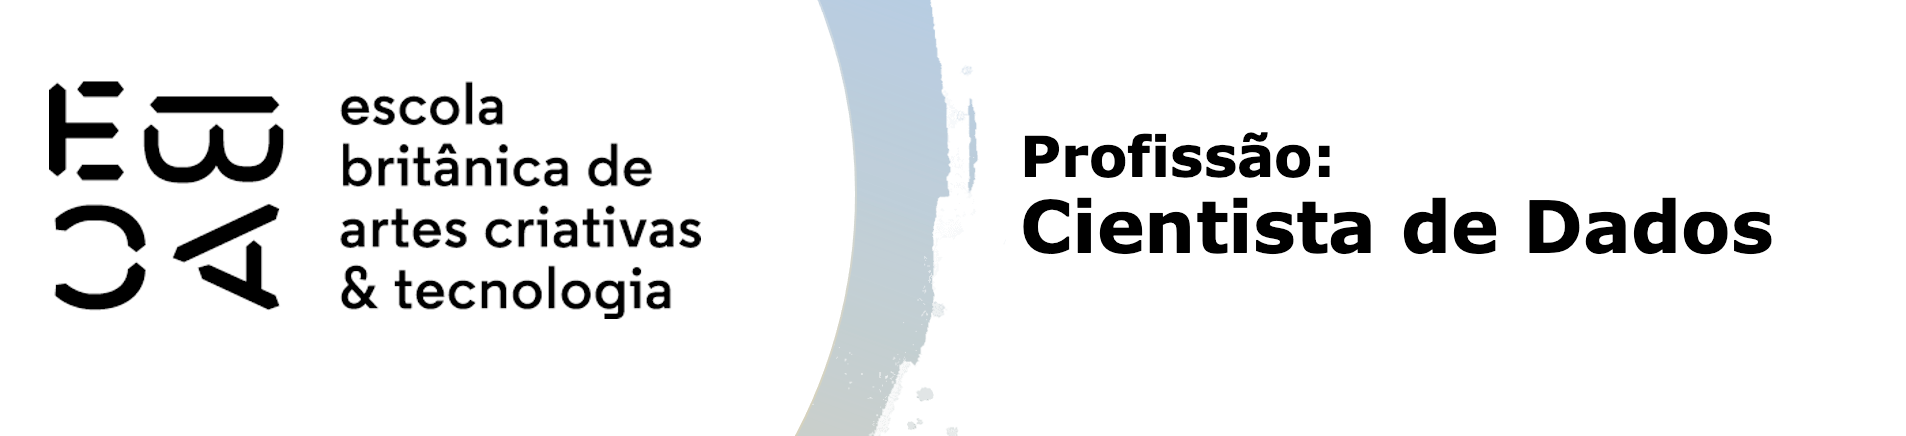

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
# Verificando a existencia de valores missing
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
# Substitui os valores missing pela média
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
# Separando as bases de treino e teste

df_train = df[:'2015-12-01']
df_test = df['2016-01-01':]

In [6]:
# Verificando se os ultimos 3 meses estão como teste
df_test.index.unique()

Index(['2016-01-01', '2016-02-01', '2016-03-01'], dtype='object', name='data_ref')

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

R-quadrado: 23.58%


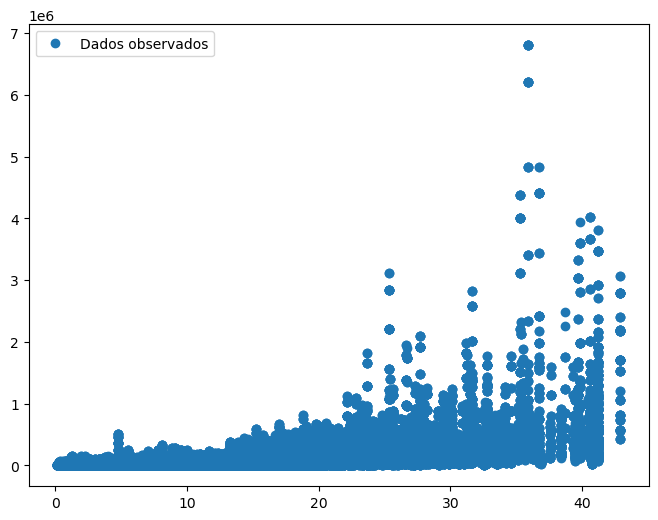

In [7]:
res = smf.ols('renda ~ tempo_emprego', data = df_train).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

def esp_vs_obs(data=df_train, res=res):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(data.tempo_emprego, data.renda, "o", label="Dados observados", alpha=1)
    ax.legend(loc="best")
    plt.show()

# Chamando a função
esp_vs_obs()



### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

C:\Users\chris\AppData\Local\Temp\ipykernel_9696\1015966290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tempo_emprego_cat'] = pd.cut(df_train['tempo_emprego'], bins=20)


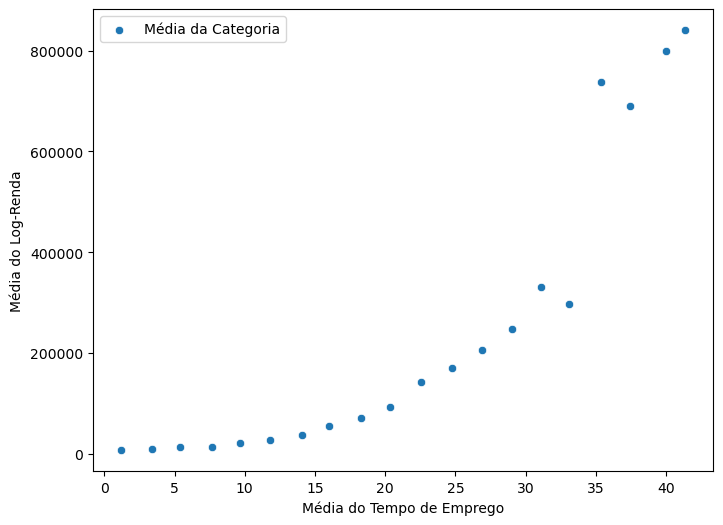

In [15]:
# Categorizando a variável 'tempo_emprego' em 20 quantis sem duplicatas
df_train['tempo_emprego_cat'] = pd.cut(df_train['tempo_emprego'], bins=20)

# Criando a tabela de perfil
tab_train = df_train.groupby('tempo_emprego_cat')['renda'].describe()
tab_train['tempo_emprego'] = df_train.groupby('tempo_emprego_cat')['tempo_emprego'].mean()

# Adicionando a média do log-renda
tab_train['log_renda'] = df_train.groupby('tempo_emprego_cat')['renda'].apply(lambda x: np.log(x.mean()))

# Renomeando as colunas
tab_train.rename(columns={'mean': 'y', '50%': 'y_median', 'std': 'y_std'}, inplace=True)



# Plotando o gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tab_train, x='tempo_emprego', y='y', label='Média da Categoria')
plt.xlabel('Média do Tempo de Emprego')
plt.ylabel('Média do Log-Renda')
plt.legend()
plt.show()

In [16]:
# Categorizando a variável 'tempo_emprego' em 20 quantis sem duplicatas
df_test['tempo_emprego_cat'] = pd.cut(df_test['tempo_emprego'], bins=20)

# Criando a tabela de perfil
tab_test = df_test.groupby('tempo_emprego_cat')['renda'].describe()
tab_test['tempo_emprego'] = df_test.groupby('tempo_emprego_cat')['tempo_emprego'].mean()

# Adicionando a média do log-renda
tab_test['log_renda'] = df_test.groupby('tempo_emprego_cat')['renda'].apply(lambda x: np.log(x.mean()))

# Renomeando as colunas
tab_test.rename(columns={'mean': 'y', '50%': 'y_median', 'std': 'y_std'}, inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_9696\351828551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['tempo_emprego_cat'] = pd.cut(df_test['tempo_emprego'], bins=20)


### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [17]:
def esp_vs_obs(data=tab_train, res=res):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(data.tempo_emprego, np.exp(data.log_renda), "o", label="Dados observados", alpha=1)
    ax.plot(data.tempo_emprego, np.exp(res.fittedvalues), "r--.", label="Estimativa OLS")
    ax.plot(data.tempo_emprego, np.exp(iv_u), "r--", label='Banda de confiança para y')
    ax.plot(data.tempo_emprego, np.exp(iv_l), "r--")
    ax.plot(data.tempo_emprego, np.exp(m_u), "g:", label='Banda de confiança para a média')
    ax.plot(data.tempo_emprego, np.exp(m_l), "g:")
    ax.legend(loc="best")
    plt.show()

# Criando um modelo usando a transformação em X
res = smf.ols('log_renda ~ np.log(tempo_emprego+200)', data = tab_train).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

R-quadrado: 99.14%


R-quadrado: 99.27%


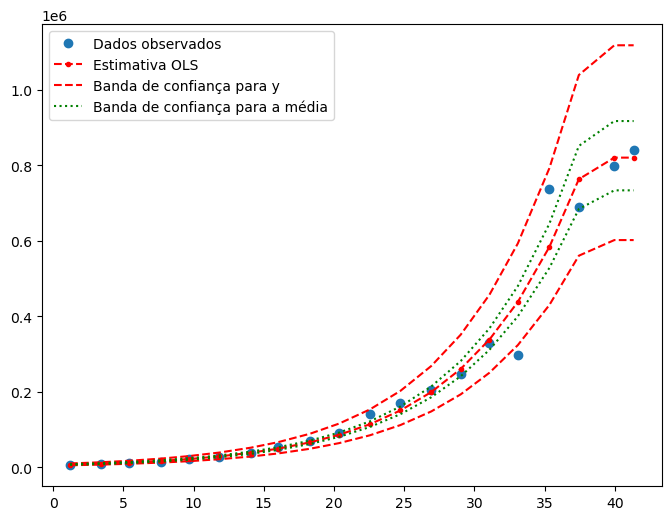

In [19]:
C1=38

# Criando as novas colunas X1_1 e X1_2
tab_train['X1_1'] = np.where(tab_train['tempo_emprego'] <= C1, tab_train['tempo_emprego'], C1)
tab_train['X1_2'] = np.where(tab_train['tempo_emprego'] > C1, tab_train['tempo_emprego'] - C1, 0)

# Ajustando o modelo usando X1_1
res = smf.ols('log_renda ~ X1_1', data=tab_train).fit()

# Imprimindo métricas do modelo
print(f'R-quadrado: {res.rsquared:.2%}')

# Visualizando os resultados
esp_vs_obs(data=tab_train, res=res)

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

R-quadrado: 99.10%


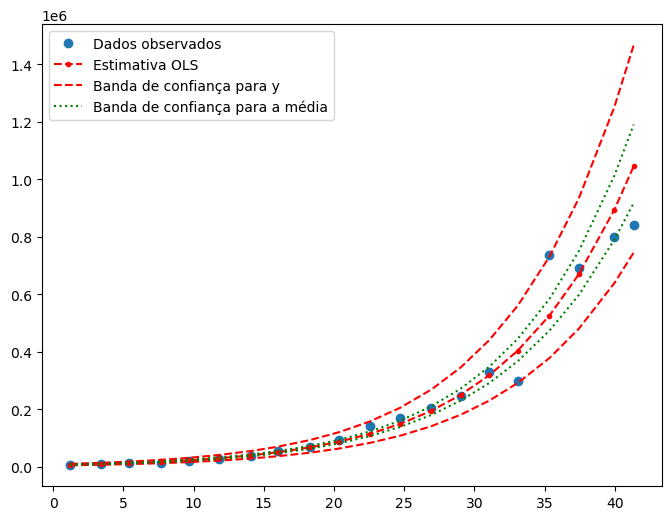

In [20]:
# Avaliando o modelo usando a transformação em X e df_test
res = smf.ols('log_renda ~ np.log(tempo_emprego+200)', data = tab_test).fit()
print(f'R-quadrado: {res.rsquared:.2%}')
esp_vs_obs()

R-quadrado: 99.20%


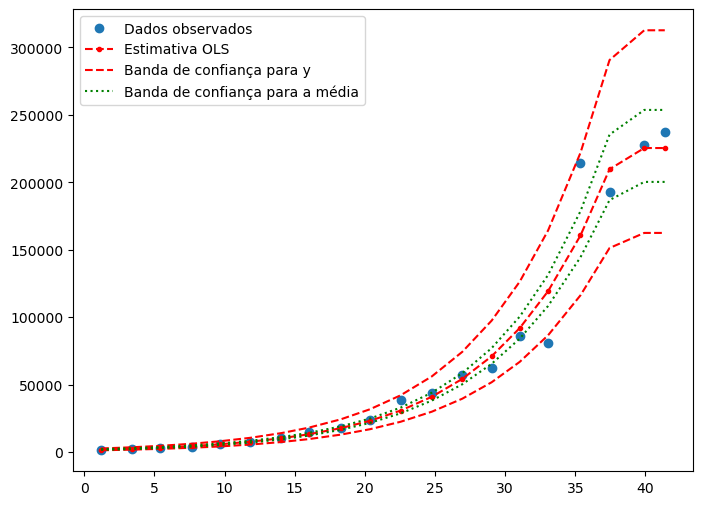

In [21]:
C1=38

# Criando as novas colunas X1_1 e X1_2
tab_test['X1_1'] = np.where(tab_test['tempo_emprego'] <= C1, tab_test['tempo_emprego'], C1)
tab_test['X1_2'] = np.where(tab_test['tempo_emprego'] > C1, tab_test['tempo_emprego'] - C1, 0)

# Ajustando o modelo usando X1_1 e tab_test
res = smf.ols('log_renda ~ X1_1', data=tab_test).fit()

# Imprimindo métricas do modelo
print(f'R-quadrado: {res.rsquared:.2%}')

# Visualizando os resultados
esp_vs_obs(data=tab_test, res=res)